In [71]:
import bs4 as bs
from dalab import *
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from datetime import datetime
import numpy as np
import re
from matplotlib import pyplot as plt
import random

from geopy.geocoders import Nominatim


pd.options.display.max_colwidth = 50
pallet = ['#D61A46', '#FDDC22', '#236AB9', '#342E09']

In [27]:
# df = pd.read_pickle('data/angel/startups.pickle')
# df = df.drop_duplicates(subset=['name'])
# df = df.dropna(subset=['link']).reset_index(drop=True)

In [16]:
# text_cols = ['joined', 'kind', 'location', 'name', 'pitch', 'market', 'stage', 'query', 'type_', 'tech']
# for col in text_cols:
#     df[col] = df[col].apply(text_norm)
# df.head()

,joined,kind,link,location,market,name,pitch,raised,size,stage,website,query,type_,tech
0,jan 12,startup,https://ange...,santa monica,data mining,tagasauris,video search...,"$1,000,000",1-10,seed,tagasauris.com,artificial i...,private company,python
1,apr 13,startup,https://ange...,silicon valley,internet of ...,healthy stove,smart techno...,"$88,000",1-10,seed,healthystove...,artificial i...,private company,python
2,jan 14,startup,https://ange...,mountain view,retail techn...,supplyai,helping reta...,"$125,000",1-10,seed,supply.ai,artificial i...,private company,python
3,jul 14,startup,https://ange...,singapore,big data ana...,nugit,from data to...,"$5,200,000",11-50,seed,nugit.co,artificial i...,private company,python
4,aug 14,startup,https://ange...,san francisco,3d printing,ornativa.com,"jewelry, 3d ...","$80,000",11-50,seed,ornativa.com,artificial i...,private company,python


In [17]:
# def process_date(date):
#     date = datetime.strptime(date, "%b %y")
#     return date

# def get_min_size(s):
#     # Using 0 for unknown
#     try:
#         return s.split('-')[0]
#     except:
#         return 0

# def money_to_numeric(s):
#     try:
#         return float(''.join(re.findall(r'\d*', s)))
#     except:
#         return np.nan
    
# def get_lifetime(date):
#     lifetime = (datetime.now() - date)
#     lifetime = int(lifetime.days/30) # monthly
#     return lifetime

In [18]:
# df['joined'] = df.joined.apply(process_date)    
# df['min_size'] = df['size'].apply(get_min_size)
# df['raised'] = df.raised.apply(money_to_numeric)
# df['lifetime'] = df.joined.apply(get_lifetime)
# df['raised_month'] = df.raised/df.lifetime

In [19]:
# df['k_raised'] = df.raised / 1000
# df['m_raised'] = df.raised / 1000000
# df['b_raised'] = df.raised / 1000000000

In [20]:
# geolocator = Nominatim()

# def get_latitude(location):
#     print(location)
#     try: return geolocator.geocode(location).latitude
#     except: return None
        
# def get_longitude(location):
#     print(location)
#     try: return geolocator.geocode(location).longitude
#     except: return None
    
# def get_address(location):
#     print(location)
#     try: return geolocator.geocode(location).address
#     except: return None

In [21]:
# df['latitude'] = df.location.apply(get_latitude)
# df['longitude'] = df.location.apply(get_longitude)
# df['address'] = df.location.apply(get_address)

santa monica
silicon valley
mountain view
singapore
san francisco
montreal
bengaluru
vancouver
vancouver
charlotte
louisville
vancouver
charlotte
new york city
dublin
london
buenos aires province
new york city
irvine
san francisco
new york city
london
london
london
boston
redwood city
sunnyvale
los angeles
cincinnati
san francisco
san francisco
san francisco
london
london
austin
melville
mumbai
palo alto
munich
minneapolis
berkeley
south africa
vancouver
bnei brak
sunnyvale
brussels
vienna
san jose
san francisco
milwaukee
boulder
san francisco
san francisco
singapore
san francisco
taipei
london
gurgaon
bordeaux
provo
hyderabad
zurich
san francisco
perth
london
san francisco
san francisco
los angeles
singapore
oakland
new jersey
vienna
singapore
victoria
los altos
new york city
palo alto
san francisco
berlin
elche
salt lake city
durham
minneapolis
venice beach
fairfax
raleigh
atlanta
bengaluru
pozna?
singapore
san francisco
london
turku
sydney
new york city

gurgaon
montreal
india
delhi

sydney
cape town
brisbane
agra

houston
gurgaon
toronto
vancouver
bengaluru
phoenix
lagos
vancouver
quebec city
santa clara
bengaluru
salt lake city
bengaluru
bengaluru
ottawa
singapore
sao paulo
adelaide
india
nacala
turkey
broomfield
federal territory of kuala lumpur
austin
dobbs ferry
perth
buenos aires
london
newport
pretoria
kampala
indore
waterford
green bay
nepal
cape town
london
riga
dover
mombasa
belarus
gurgaon
montreal
gurgaon
auckland
michigan
cairo governorate
bengaluru
tampere
hyderabad
lagos
delhi
delhi
delhi
palo alto
bali
hong kong
almaty
gurgaon
port harcourt
antipolo
lagos
victoria
sofia
san francisco
czech republic
bengaluru
melbourne

vancouver
kaunas
pune
hartford
united kingdom
faridabad
karachi
melbourne
delhi
kent
kolkata
singapore
bahadurgarh
delhi

dubai
jorhat
lagos
faridabad
lisbon
mumbai
stockholm
hyderabad

boston
guildford
bengaluru
oceanside
calgary
helsinki
bengaluru
jerusalem
india
haifa
san francisco
miami
denver
quetta
brooklyn
amsterdam
oakland
oak

amsterdam
san francisco
perth
waterloo
nagercoil
london
singapore
london
bengaluru
hong kong
reston
scottsdale
mexico city
peru
london
san francisco
mountain view
london
toronto
berlin
mexico city
kitchener
austin
singapore
taiwan
london
mountain view
seattle
pune
copenhagen
paris
delaware
new york city
sri lanka
kitchener
bengaluru
montreal
silicon valley
mumbai
monterey
nigeria
san francisco
ashburn
joinville
india
montreal
san francisco
lima district
tel aviv district
los angeles
seattle
geneva
bengaluru
madurai
birmingham
kyiv city
auckland
singapore
san francisco
guadalajara
mars
san jose
ahmedabad
tel aviv yafo
singapore
boston
berlin
birmingham
vienna
toronto
san francisco
burlington
boulder
berlin
denver
san francisco
sydney
hamburg
cambridge
sydney
new york city
san francisco
mountain view
united states
austin
berlin
sao paulo
brookfield
puerto rico
foster city
irvine
new york city
pittsburgh
erie
chicago
san francisco
new york city
marrakesh
denver
lugano
portland
san diego
n

minneapolis
virginia beach
new york
mountain view
berlin
san francisco
san jose
san francisco
san francisco
seoul
chicago
santiago
san francisco
shanghai
hong kong
waterloo
los angeles
san francisco bay area
san francisco
delaware
portland
toronto
singapore
singapore
san jose
medellin
florida
san francisco
beijing
new york city
austin
wurzburg
taipei
los angeles
london
jakarta
los angeles
new york city
san francisco
san francisco
san francisco
san diego
stockholm
san francisco
dallas
san francisco
montevideo
bengaluru
san francisco
san francisco
reading
copenhagen
toronto
los angeles
dublin
boulder
atlanta
colorado
melbourne
panama city
san luis obispo

buenos aires province
nashville
buenos aires province
lisbon
los angeles
miami
hong kong
hanover
toronto
los angeles
mumbai suburban
amsterdam
paris
los angeles
los angeles
los altos
san francisco
austin
boston
hyderabad
moscow
los angeles
chandigarh
san francisco
menlo park
boston
san francisco
london
boston
pasadena
paris
bengaluru
bo

san francisco
fort lauderdale
london
boston
san francisco
san francisco
palo alto
redwood city
mountain view
menlo park
costa mesa
silicon valley
new york city
new york city
vancouver
san francisco
london
palo alto
san francisco
singapore
san francisco
san francisco
san francisco
san francisco
mexico
london
new york city
berkeley

san francisco
mountain view
new york city
san francisco
san francisco
san francisco

san francisco
san francisco
san francisco
san francisco
montreal
london
new york city
berlin
dublin
london
boston
mountain view
new york city
san francisco
mountain view
san francisco

san francisco
pittsburgh
palo alto
montreal
singapore
san francisco
seattle
toronto
toronto
san francisco
montreal
new york city
london
san francisco
south san francisco
san francisco
san francisco
san francisco
palo alto
sydney
san francisco
san francisco
boston
toronto
palo alto
palo alto
san francisco
menlo park
palo alto
redwood city
san francisco
boston
bad homburg
austin
cologne
sunnyvale

san francisco
san francisco
san francisco
new york city
redwood city
sunnyvale
boulder
san francisco
atlanta
san francisco
san francisco
seattle
san francisco
silicon valley
paris
cleveland
redwood city
oakland
san francisco
london
san francisco
san mateo
san diego
seattle
washington dc
palo alto
san mateo
los altos
mountain view
san francisco
plano
san francisco
sunnyvale
nashua
silicon valley
los angeles
new york city
silicon valley
berkeley
san mateo
palo alto
san francisco

berlin
santa monica
san francisco
san francisco
seattle
new york city
colorado
palo alto
san francisco
san francisco
palo alto
austin
boulder
san francisco
princeton
boulder
san mateo
san francisco
new york city
toronto
new york city
palo alto
mountain view
san francisco
mountain view
new york city
washington dc
new york city
new york city
new york city
cambridge
austin
chicago
boston
santa monica
san francisco
new york city
boston
chicago
new york city
san francisco
los angeles
boulder
san francisco
san francis

berlin
sydney
new york city

seattle
cupertino
arlington
tel aviv yafo
montreal
philadelphia
miami
dallas
san francisco
palo alto
new york city
pittsburgh
silicon valley
san francisco
montreal
san francisco
new york
montreal
pasadena
toronto
troy
baltimore
new york city
palo alto
austin
nashville
berlin
new york city
austin
baltimore
san francisco
vancouver
new york city
washington dc
yangon
santa monica
san francisco
lausanne
san francisco
marina del rey
new york city
new york city
netherlands
washington dc
new york city
new york city
paris
new york city
pune
netherlands
san francisco
palo alto
dallas
new york city
san diego
san francisco
san francisco
london
atlanta
orem
berlin
pasadena
san jose
chicago
hyderabad
berkeley
london
london
zurich
cambridge
san jose
san francisco
san francisco
bengaluru
new york city
new york city

finland
bengaluru
singapore
san francisco
hong kong
london
san francisco
boston
san francisco
austin
saratoga
dubai
chicago
minsk
mountain view

prague
new yor

manila
san francisco
new york
kochi
new york city
tallinn
bengaluru
or yehuda
india
rouen
coral springs
danville
jersey city
las rozas
boston
palo alto
new york city
san francisco
sunnyvale
new york city
bengaluru
saint petersburg
redwood city
cologne
delaware
singapore
austin
san francisco
palo alto
london
vancouver
atlanta
vienna
palo alto
austin
san francisco
sydney
seminole
london
kiel
new york city
gurgaon
prague
india
new york city
united states
fort lauderdale
india
bucharest
dallas
toronto
cologne
braintree
boston
paris
las vegas
vienna
shanghai
moscow

bangkok
zurich
st. louis
toronto
seattle
provo
bari
las vegas

united states
paris
geneva
bangalore urban
mumbai
lansing

bengaluru

united states
los angeles
united states
newport beach
marietta
ahmedabad
ahmedabad
mauritius
bandung


new delhi


turku
bhopal
jersey city
montreal
gurgaon
barcelona
melbourne
london

toronto
dallas
berlin
boston
delhi
madrid
mombasa


singapore

pune
scottsdale
gurgaon
tokyo
bengaluru


phnom pen

bengaluru
los angeles
austin
colorado springs
united states

tel aviv yafo
palo alto
san jose

vilnius county
london
zurich
tel aviv yafo
amsterdam
berlin
berlin
shanghai

mexico city
neuilly plaisance
mauritius
orlando
new york city
bengaluru
london

pune
dublin
tel aviv yafo
boston
philadelphia
palo alto
united states
thessaloniki
pretoria
bloomingdale
bucharest
ukraine
singapore
osaka
fort lauderdale
hamburg
london
new york city
san francisco
new york city
skopje
montreal
moscow
tel aviv yafo
spain



montreal

seoul
karachi





san diego
bourges



vancouver



san francisco bay area
hamburg
karachi

hampton
san jose
kyivska oblast
ottawa
austin

tel aviv yafo



seoul
brasov
boston
helsinki
san francisco

bengaluru
salt lake city


vancouver
boston



tokyo


london

rotterdam
atlanta
los angeles
bengaluru
san francisco
germantown

atlanta
vienna
sydney
san francisco
san francisco
amsterdam


san francisco


helsinki
edmonton


singapore
berlin
new york city
hyderabad

hanoi
geor

paris

new york city
london
san francisco
los angeles
beijing
san francisco
delray beach
san francisco
cluj napoca
san francisco
sao paulo
toronto
mountain view
tokyo
oakland
london
new york city
london
sunnyvale
delhi
london
berlin
gurgaon
curitiba
toronto
palo alto
boulder

san francisco
hamburg
iowa city
miami
vienna
noida
san francisco
india
seattle
indianapolis
london
san jose
bengaluru
los angeles
campbell
cambridge
sunnyvale
zurich
toronto
new york city
london
tel aviv yafo
tampa
san francisco
london
delhi
singapore
cambridge
dublin
los angeles
frankfurt
montreal
vancouver
san francisco
united kingdom
groningen
washington dc
san francisco bay area
silicon valley
bengaluru
los angeles
bengaluru
toronto

london
singapore
seattle
winnipeg
sydney
santa clara
crowthorne
mumbai
washington dc
spain
pune
bengaluru
cambridge
philadelphia
boston
chennai
new york city
london
sunnyvale
calgary
berlin
lisbon
dublin
bengaluru
philadelphia
munich
cleveland
san francisco
chicago
los angeles
oxf

singapore
london
hyderabad
philadelphia
sri ganganagar
spain
singapore
melbourne
seattle
amsterdam
kiev
sintra
hook norton
san francisco
fishers
mumbai
dallas
aliso viejo
berkeley
san jose
munich
memphis
london
pleasanton
lisbon
delhi
amsterdam
johannesburg
vancouver
toronto
singapore
rio de janeiro
san francisco
san francisco
beijing
stockholm
san francisco
austin
helsinki
toronto
mumbai
kansas city
san francisco

buffalo
austin
london
irvine
ladera ranch
sydney
vancouver
singapore
port louis
san francisco
seattle
aschersleben
indore
san francisco
san francisco
vancouver
brooklyn
irvine
irvine
irvine
seattle
globe
orange
melbourne
maintal
santa clara
san francisco
vancouver
singapore
hyderabad
detroit
new york city
los angeles
atlanta
toronto
boston
prague
philadelphia
united states
london
san mateo

chicago
chicago
lydenburg
san francisco
sydney
stockholm
tel aviv yafo
san francisco
london
london
waterloo
seattle
austin
lisbon
boston

san francisco
berkeley
new york city
vancouver
mi

bratislava
krasnoyarsk
singapore
newark
san francisco
toronto
london
seattle
delhi
atlanta
white plains
london
new york city
san francisco
santa monica
sunnyvale
curitiba
auckland
geneva
durham
buenos aires province
seattle
san francisco
london
berkeley
london
latvia
seattle
buenos aires province
london
waterloo
delhi
san francisco
belfast
paris
san francisco
orange county
buenos aires province
jakarta
buenos aires province
kiev
boston
waterloo
san francisco
austin
san jose
seattle
culver city
san francisco
san francisco
london
berlin
london
san francisco
toronto
tallinn
san jose
tbilisi
scottsdale

lisbon
oulu
toronto
san francisco
helsinki
vancouver
seattle
frisco
baltimore
oradea
san francisco
los angeles
san jose
ottawa
london
lyon
palo alto
jeddah
toronto
antwerpen
san francisco
mumbai
brussels
cleveland
manchester
new york city
tel aviv yafo
boston
toronto
peru
guildford
san francisco
san francisco
san francisco
boston
austin
miami
london
edinburgh
boston
china
stanford
special c

california
san francisco
redwood city
boston
copenhagen
lagos
santa monica
san mateo
denver
montreal
singapore
chicago
tel aviv yafo
boston
cambridge
tel aviv yafo
london
waterloo
helsinki
asheville
san luis obispo
melbourne
buea
charleston
new york city
boston
bengaluru
boulder
bengaluru
chicago
new york city
new york city
palo alto

palo alto
san francisco
mountain view
portland
san francisco
santa cruz
seattle
redwood city
san francisco
san diego
san francisco
san mateo
san rafael
mountain view
toronto
san francisco
argentina
baltimore
tel aviv yafo
newark
mountain view
san francisco
overland park
austin
washington dc
denver
boulder
new york city
new york city
austin
singapore
austin
san francisco
seattle
perth
berkeley
berlin
paris
new york city
chicago
austin
seattle
sunnyvale
palo alto
palo alto
champaign
san francisco
halifax
los angeles
irvine
new york city
new york city
maryland
new york city
new york city
los angeles
austin
bielefeld
las vegas
los angeles
san francisco
bengal

san francisco
bengaluru
miami
nigeria
san francisco
kassel
brisbane
nashville
hamilton
san francisco
dubai
san francisco
bengaluru
boston
palo alto
fort lauderdale
amsterdam
honolulu
san francisco
london
london
palo alto
san francisco bay area
mumbai
washington dc
gurgaon
san diego
fairfax
fort collins
san francisco
new york city
san francisco
berkeley
sunnyvale
san francisco
redwood city
sydney
austin
london
madison
san francisco
san francisco
san francisco
los angeles
cordoba
denver
buenos aires province
london
baltimore
bangkok
buenos aires province
palo alto
austin
mountain view
sunnyvale
newport beach
houston
oakland
bengaluru
orange county
london
mexico city
ann arbor
los angeles
san diego
san francisco
delhi
austin
munich
los angeles
lille
new york city
london
los angeles
orlando
los angeles
mumbai
washington dc
austin
buenos aires province
san francisco
melbourne
las vegas
kyivska oblast
austin
houston
portland
kiel
san francisco
pune
gurgaon
gurgaon
bahrain
stockholm
hod hasha

san mateo
redwood city
san francisco
boston
new york city
vancouver
new york city
san francisco
san francisco
boston
san francisco
austin
cambridge
singapore
new york city
mountain view
corvallis
cambridge
san francisco
san francisco
san francisco
san francisco
cambridge


memphis
san francisco
silicon valley
sunnyvale
new york city
palo alto
seattle
guadalajara
san francisco
san francisco
chandler

new york city
menlo park
los angeles
delhi
london
austin
mountain view
san francisco
oslo
bangkok
new york city
san francisco
tel aviv yafo
san francisco
san francisco
cambridge
irvine
cambridge
berkeley
white plains
singapore
palo alto
palo alto
austin
montreal
san francisco
los angeles
mountain view
redwood city
mountain view
mountain view
austin
san francisco
san francisco
san francisco
san francisco
san francisco
boston
san francisco
new york city
san francisco
san francisco
san francisco
san francisco
boston
san francisco
palo alto
san francisco
boston
san francisco
san francisco
san m

markham
new york city
phoenix
gurgaon
sao paulo
redwood city
san francisco
delft
bremen
san francisco
miami
new york city
berlin
london
brussels
prague
ploiesti
san francisco
banja luka
detroit
sydney
bucharest
delhi
palo alto

bengaluru
palo alto
new york city
new york city
lahore
minsk
london
canada
detroit
denver
ukraine
spain
tehran
caxias do sul
vancouver
paris
mumbai
gurgaon
bengaluru
hyderabad
dallas
brisbane
toronto
san diego
zurich

delhi
melbourne
seattle
earth
cheyenne
brazil
cincinnati
san francisco
sao paulo
london
moscow
kiev
austin
bengaluru
norman
hamburg
tartu
bengaluru
monterrey
madrid
brussels
koice
saint petersburg
waterloo
belo horizonte
delhi

denver
zurich
novi sad
padua
special region of yogyakarta
hyderabad
new york city
ottawa
delhi
san francisco
new york city
santo domingo de guzman
nairobi
copenhagen
india
brighton
colorado city
hamburg















moscow







moscow






hong kong






palo alto



brussels




copenhagen



prague


ontario










philadelphia
california
dallas
boston
san francisco
new york city
berlin
bethesda
san francisco
bologna
new york city
truckee
mountain view
ahmedabad
sydney
new york city
san francisco
dublin

hong kong
tel aviv yafo
bengaluru
seattle
manhattan
st. louis
delhi
san francisco
san francisco
singapore
oakland
new york city
palo alto
mountain view
san francisco
duncraig
oakland
palo alto
palo alto
san mateo
cairo governorate

san francisco
rome
london
singapore
san francisco
copenhagen
adelaide
los angeles
london
berlin
bengaluru
san francisco
bengaluru
milwaukee
hyderabad
falls church
san francisco

sao paulo
amsterdam
london
italy
massachusetts
aurora
philadelphia
toronto
oxford
los angeles
foster city
bengaluru
krakow
london
berlin
singapore

los angeles
sao paulo
surabaya city
austin
mumbai
hyderabad
saint petersburg
stanford
toronto
beijing
new york city
boise
london
vancouver
santiago de compostela
tokyo
toronto
pune
bengaluru
hyderabad
paris
gurgaon
lviv
singapore
lahore
israel
hong 

san francisco bay area
chennai
hyderabad
zalaszentgrot
malmo
philadelphia
berlin
indian harbour beach
annapolis
singapore
seoul
cheyenne
denver
london
portland
bengaluru
bengaluru
orange county
federal capital territory
georgia
hyderabad
bhubaneswar
emerald hills
irvine
bengaluru
perth
boston
stockholm
mumbai
san jose
bengaluru
perth
zurich

israel
punta gorda
san jose
new york city
fremont
nagpur
chennai
costa mesa
anantapur
sheffield
ukraine
united states
salt lake city
arlington
tel aviv yafo
san francisco
san francisco

los gatos
bengaluru
boston
sunnyvale
mountain view
united states
menlo park
madison
los angeles
st. louis
madison
vancouver
pakistan
san francisco
ahmedabad
new york city
uk
united states
united states
delhi

lucknow
kendal
united states
cardiff
dhaka
toronto
belarus
vietnam
india
united states
moscow
lahore
sri lanka
rajkot


san francisco
nantes
lyon


brighton


ahmedabad
cincinnati
ghaziabad
united states
new york city
st. louis

verden


hyderabad

colombo



n

colorado springs
greece
toronto
toronto
bengaluru
california
bogota
antelope
detroit
southern california
gdynia
new york city
los angeles
delhi
tehran
san diego
los angeles
melbourne
cape town
washington dc
beijing
raleigh
london
las vegas
tyler
los angeles

paris
canberra
india
brisbane
hamburg
bengaluru
ludhiana
india
san diego
florence
bogota
austin


chicago


houten
los angeles


san mateo
united states
florida

bengaluru
new york city
bangkok

mumbai








stone mountain

portland
san francisco

earth
london
special capital region of jakarta
san francisco bay area
amman
moscow
buenos aires province
austin
bengaluru
west hollywood
new york city
san jose
cleveland
montreal

west hollywood

sydney
baltimore
barcelona
california city
sydney
kampala
san francisco
mexico city
los angeles
houston
malaysia
beirut
halifax
ho chi minh city
annapolis
los angeles
uruguay
newport
pittsburgh





oppenheim
madrid
london
kolkata
new york city


lisbon

gainesville
hong kong

san francisco
med

san francisco
manila
waterloo

amsterdam
helsinki
san francisco
singapore
redwood city
san francisco
los angeles
oakland
london
san francisco
nashville
new york city
boston
san francisco

oklahoma city
ottawa

new york city
los angeles
menlo park
atlanta
taipei
los altos
melbourne
orlando
palo alto
san francisco
hanoi
atlanta
san francisco
san francisco
silver spring
haifa
san jose
new york city

santa monica
philadelphia
israel
seattle
sunnyvale
carrboro
san francisco

palo alto
new york city
tel aviv yafo
lund
oakland
dallas
atlanta
israel
san francisco
redwood city
boston
boston
london
palo alto
bengaluru
los angeles
london
miami
austin
lisbon
san francisco
san francisco
chicago
winnipeg
pensacola
princeton
austin
los angeles
markham
seattle
palo alto
boulder

bengaluru
chicago

portland
boston
minneapolis
san francisco
earth
mumbai
vienna
palo alto
san jose
potomac
atlanta
new york city

dayton
new york city
san diego
new york city
provo

europe
san mateo
ukraine
chisinau
new york 

cape town
dongguan
hong kong
washington dc
san francisco
santander
san ramon
bengaluru
sydney
san francisco
manchester
san francisco
bozeman
san francisco
lusaka
palo alto
delaware
atlanta
san diego
austin
new york city

santa clara
san francisco
new york city
san mateo
san francisco
scotts valley
singapore
los angeles
vancouver
boulder
edinburgh
jacksonville
new york city
mumbai
new york city
munich
chicago
san francisco
london
boston
prospect heights
orlando
singapore
oakland
san francisco
santiago
switzerland
london
san jose
singapore
thessaloniki
destin

africa
singapore

chennai
toronto
mumbai
irvine
singapore
pune
kiev
singapore

palo alto

london
delhi
noida
kolkata
los angeles
delaware
hyderabad
princeton
ontario
london
los angeles
singapore
vancouver
san francisco
jalandhar
raipur
miami
pune
enschede
pune
buenos aires province
san francisco
mumbai
singapore
silicon valley
toronto
las vegas
buenos aires province
lahore
the hague
buenos aires province
bengaluru
pune
perth
delhi


san francisco
san francisco
vancouver
san francisco
san francisco
san francisco
new york city
san francisco
budapest
fresno
sunnyvale
shanghai
san francisco
san francisco
san diego
englewood
bellevue
atlanta
new york city
new york city
atlanta
mountain view
ireland
los angeles
new york city
new york city
san diego
london
new york city
belo horizonte
san diego
san francisco
berlin
melbourne
new york city
new york city
san francisco
san francisco
sydney
silicon valley
san francisco
new york city
los angeles
gurgaon
detroit
tel aviv yafo
san francisco
san francisco
southborough
krakow
new york city
san jose
san francisco
berkeley
amsterdam
san francisco
san francisco
victoria
new york city
san francisco
seattle
san francisco
san francisco
pasadena
philadelphia
buenos aires
paris
boston
san francisco
santa cruz
london
paris
san francisco
san francisco
berlin
san jose
vancouver
palo alto
san francisco
san francisco
remote
berlin
san francisco
austin
melbourne

israel
los angeles
london
lond

leuven
buenos aires province
fremont
toronto
mumbai
san francisco
provo
new york city
paris
san diego
chester
sutherland
san francisco
lisbon
buenos aires
berlin

aix en provence
vienna
ramallah
london
san francisco
montreal
san francisco
portland
seattle
new york city
san francisco
singapore
london
boston
san francisco
tallinn
toronto
stockholm
san francisco
boulder
san francisco
ames
hong kong
buenos aires
buenos aires
miami
tallinn
chennai
toronto
chiba
los angeles
hartford
san francisco
buenos aires province
melbourne
ukiah
the woodlands

lisbon
palma
boulder
san francisco
san francisco
orlando
london
hamburg
bengaluru
ottawa
buenos aires province
brussels
taipei
nassau
utah
indianapolis
paris
san mateo
hong kong
taiwan
ann arbor
buenos aires
amsterdam
sheffield
bengaluru
cleveland
sunnyvale
taiwan
panama city
cardiff
san francisco
kigali
surat
dublin
noida
dublin
tallinn
australia
sunnyvale
new york city
fleet
helsinki
ecuador
sydney
miami
chicago
paris
los angeles
redwood city
ma

san diego
san francisco
redwood city
sofia
los angeles
san francisco
mountain view
new york city
san francisco
sunnyvale
london
new york city
san francisco
santa monica
palo alto
new york city
san francisco
sunnyvale
new york city
san francisco
redwood city
new york city
san francisco
boston
silicon valley
chicago
santa monica
san francisco
san francisco

new york city
palo alto
san francisco
san francisco
london
san francisco
san francisco
chandler
san francisco
san jose
san francisco
san francisco
mountain view
san mateo
new york city
new york city
san francisco
buffalo
san francisco
san francisco
san francisco
san diego
waterloo
palo alto
palo alto
san francisco
lisbon
london
belfast
palo alto
austin
mountain view
london
columbus
new york city
waterloo
new york city
cambridge
san francisco
san francisco
san francisco
new york city
hanoi
boston
tel aviv yafo
san francisco
san francisco
palo alto
san jose
cincinnati
london
new york city
new york city
berlin
singapore
seattle
new york 

boca raton
toronto
san francisco
washington dc
san francisco
san francisco
delhi
washington dc
sunnyvale
cambridge
vancouver
redwood city
austin
boston
tel aviv yafo
vancouver
chicago
geneva
trento
cambridge
pittsburgh
pune
new york city
boston
new york city
el segundo
new york city
san francisco
boston
austin

mumbai
cambridge
washington dc
palo alto
new york city

berlin
philadelphia
singapore
princeton
singapore
liege
seattle
new york city
madison
miami
chicago
united states
pleasanton
london
charlotte
san francisco
danville
san jose
san francisco
knoxville
london
bengaluru
san francisco
raleigh

bengaluru
mumbai
santa monica
florida
lowell
montreal
san francisco
san francisco
oakland

new york city
washington dc
san francisco
san francisco
san francisco
new york city
palo alto
san francisco
wilmington
san francisco
menlo park

palo alto
boston
san francisco
san francisco
san mateo
san francisco
san francisco
washington dc
irvine
menlo park
mountain view
mountain view
austin
san fra

boston

warsaw
san francisco
austin
palo alto
san mateo
silicon valley
mountain view
san jose
san francisco
london
london
london
new york city
palo alto
new york city
mountain view
toronto
london
san francisco
denver
toronto
san francisco
samara
sunnyvale
earth
san jose
san diego
melbourne
san francisco
sunnyvale
san francisco
cary
hyderabad
santa cruz
mountain view
austin
sydney
dallas
new york city
austin
israel
san francisco
vancouver
austin
san jose
berlin
tallinn
scottsdale
reston
palo alto
boston
san francisco
london
chicago
georgia
toronto
delhi
shanghai
palo alto
new york city
boston
pleasanton
vancouver
paris
menlo park
france
new york city
san francisco
santa clara
sydney
nashua
palo alto
silicon valley
palo alto
arlington
cambridge

fairfax
boulder
london
new york city
san francisco
san francisco
palo alto
san francisco
cambridge
san francisco
los angeles
new york city
san francisco
berkeley
san francisco
london
shanghai
new york city
los altos
lexington
san francisco

talli

new york city
berlin
seattle

san francisco
bellevue
shanghai
gurgaon
san carlos
las vegas
salt lake city
new york city
san diego
switzerland
boston
los angeles
sydney
boston
boston
portland
tel aviv yafo
ukraine
mountain view
london
new york city
kilkenny
st. louis
san diego
london
new york city
clarksburg
sunnyvale
hyderabad
saint john
belo horizonte
akron
san jose
london
sofia
sofia
portland
eugene
toronto
victoria
boston
london
san pedro sula
san francisco
durham
japan
london
san francisco
new york city
santiago
los angeles
germany
toronto

san francisco
madrid
berkeley
guadalajara
brooklyn
san diego
new york city
washington dc
new york city
seattle
beijing
panama city
singapore
santiago
toronto
santiago
stockholm
cordoba
bengaluru
seattle

houston
madison
london
sao paulo
los angeles
vancouver
hyderabad
atlanta
tel aviv yafo
pune
austria
london
moscow
new york city
europe
sunnyvale
madrid
bellingham

san francisco
bengaluru
tel aviv yafo
cape town
st. louis
sydney
laguna niguel
mo

bengaluru
tel aviv yafo
argentina
austin
hong kong
philadelphia
cambridge


kyivska oblast
charlotte
medellin
cologne
munich
geneva
visakhapatnam
brooklyn
london
gurgaon
london
london
san francisco
chicago

delhi
london

israel
london
new delhi
vilnius county
pune
forsyth
new york city
berkeley
toronto
raleigh
austin
tel aviv yafo
woodbridge
new york city
san francisco
leipzig
sydney
seattle
london
tokyo
moscow
toronto
ahmedabad
india
yokneam illit
krakow
los angeles
prague
germany
toronto
noida

hong kong


cambridge

arizona
sunnyvale

los angeles








san francisco


london
seoul

san francisco

london
hong kong
redmond
noida

new york city

boston
udaipur
hong kong

san jose



london
san francisco
melbourne
bengaluru
san francisco
palo alto
mountain view
fairfax
palo alto
berkeley
san francisco
pasadena
seattle
cambridge
boston
new york city
galway
paris
paris


charlotte
pittsburgh
san francisco
san francisco
new york city
san francisco
london
boston
palo alto
san francisco
pa

brussels
los angeles
san leandro
holland
los angeles
san francisco
san francisco
woodside
mountain view
san francisco
vancouver
durham
boston
new york city
san francisco
provo
chicago
mountain view
san francisco
san francisco
oakland
mumbai
mumbai
san francisco
new york city
san francisco
san antonio
san francisco
san francisco
buenos aires district
united kingdom
austin
singapore
sydney
berlin
new york city
mexico city
new york city
manhattan
special capital region of jakarta
helsinki
oakland
vancouver
delhi
redwood city
new york city
london
los gatos
san francisco
boston
san antonio
san francisco
seattle
los angeles
san francisco
buenos aires province

los angeles
london
columbus
san francisco
manila
new york city
california
new york city
new york city
san antonio
san francisco
berlin
san mateo
san francisco
palo alto
bengaluru
sunnyvale

bengaluru
united states
burlingame
san francisco

san mateo
silicon valley
seattle
palo alto
seattle
san mateo
san francisco
austin
rockville
helsi

In [34]:
df = pd.read_pickle('data/angel/startups_processed.pickle')

In [36]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

def cluster_map(df, popup_col=None):
    
    if popup_col:
        map_df = df[['latitude', 'longitude', popup_col]].dropna()
    else:
        map_df = df[['latitude', 'longitude']].dropna()
        
    cmap = folium.Map(location=[map_df.latitude.median(), map_df.longitude.median()], zoom_start=5,)
    marker_cluster = MarkerCluster().add_to(cmap)
    
    for index, row in map_df.iterrows():
        lat = row['latitude']
        lon = row['longitude']
        try: popup = row[popup_col]
        except: popup = None

        folium.Marker(location=[lat, lon], popup=popup, 
                      icon=folium.Icon(color='blue', icon='info-sign')).add_to(marker_cluster)

    return cmap

cmap = cluster_map(df, popup_col='website')
cmap.save('data/angel/cmap.html')

In [48]:
def heat_map(df):
    map_df = df[['latitude', 'longitude']].dropna()
    hmap = folium.Map(location=[map_df.latitude.median(), map_df.longitude.median()], zoom_start=2,)
    heat = map_df.as_matrix().tolist()
    hmap.add_children(HeatMap(heat))
    return hmap

hmap = heat_map(df)
hmap.save('data/angel/hmap.html')

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [68]:
def heat_wmap(df):
    map_df = df[['latitude', 'longitude', 'm_raised']].dropna()
    hmap = folium.Map(location=[map_df.latitude.median(), map_df.longitude.median()], zoom_start=2,)
    heat = map_df.as_matrix().tolist()
    hmap.add_children(HeatMap(heat))
    return hmap

hwmap = heat_wmap(df)
hwmap.save('data/angel/hmap_weighted.html')

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [72]:
df[['b_raised', 'website']].sort_values(by=['b_raised'], ascending=False).head()

,b_raised,website
9581,10.33356,airbnb.com
9583,4.20000,netscape.aol.com
9590,3.28000,nest.com
6781,2.12920,palantir.com
6498,1.70000,grail.com


/Users/rodrigonader/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


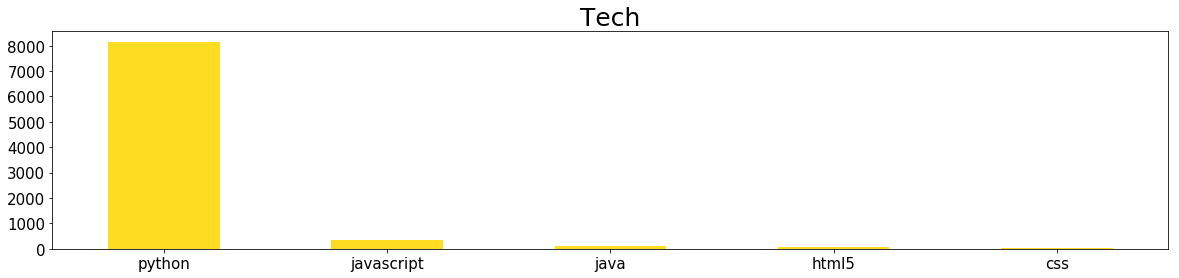

In [73]:
tech_counts = df.groupby('tech').count().name.sort_values(ascending=False)

fig = plt.figure(figsize=[20,4])
plt.title('Tech', fontsize=25)
tech_counts.plot(kind='bar', color=random.choice(pallet), fontsize=15, rot=0)
plt.xlabel('')
plt.show()

In [74]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = tech_counts.index.tolist()
values = tech_counts.values.tolist()

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



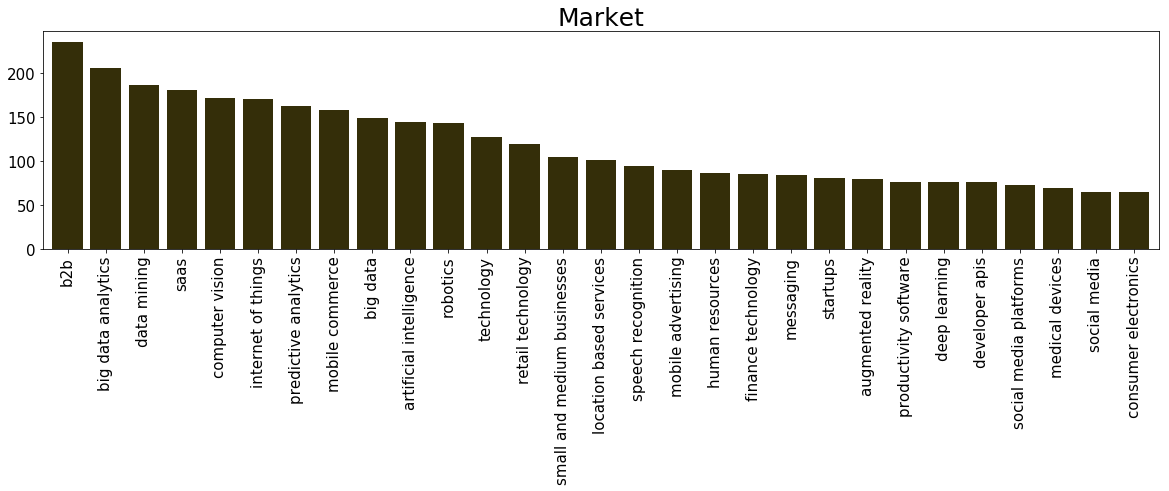

In [83]:
market_counts = df.groupby('market').count().name.sort_values(ascending=False).iloc[:30]
market_counts = market_counts[market_counts.index != ''].sort_values(ascending=False)
fig = plt.figure(figsize=[20,4])
plt.title('Market', fontsize=25)
market_counts.plot(kind='bar', color=random.choice(pallet), fontsize=15, width=0.8)
plt.xlabel('')
plt.show()

In [84]:
labels = market_counts.index.tolist()
values = market_counts.values.tolist()
trace = go.Pie(labels=labels, values=values)
py.iplot([trace], filename='basic_pie_chart')

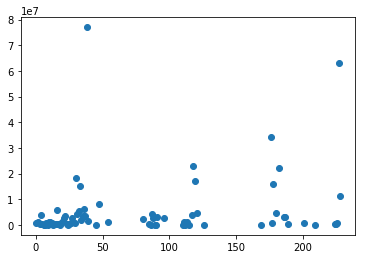

In [85]:
b2b_dist = df[df.market == 'b2b'].reset_index(drop=True)
plt.scatter(b2b_dist.index, b2b_dist.raised)
plt.show()

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



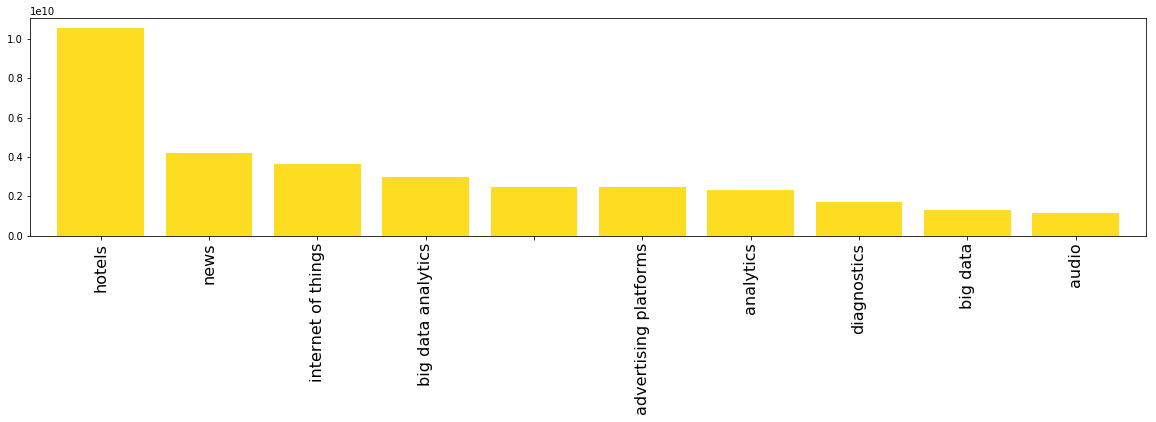

In [86]:
fig = plt.figure(figsize=[20,4])
plt.xticks(fontsize=16)
market_sum = df.groupby('market').sum().raised.nlargest(10)
market_sum.plot(kind='bar', color=random.choice(pallet), width=0.8)
plt.xlabel('')
plt.show()

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



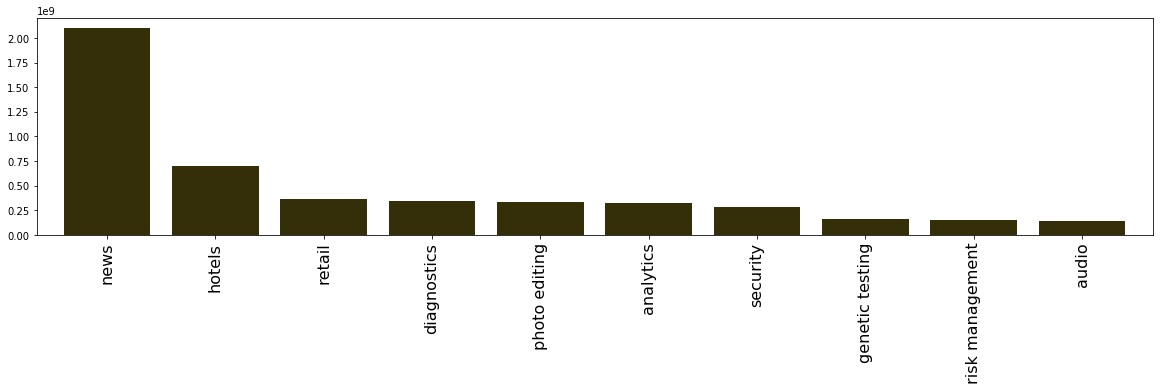

In [87]:
fig = plt.figure(figsize=[20,4])
plt.xticks(fontsize=16)
market_mean = df.groupby('market').mean().raised.nlargest(10)
market_mean.plot(kind='bar', color=random.choice(pallet), width=0.8)
plt.xlabel('')
plt.show()

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



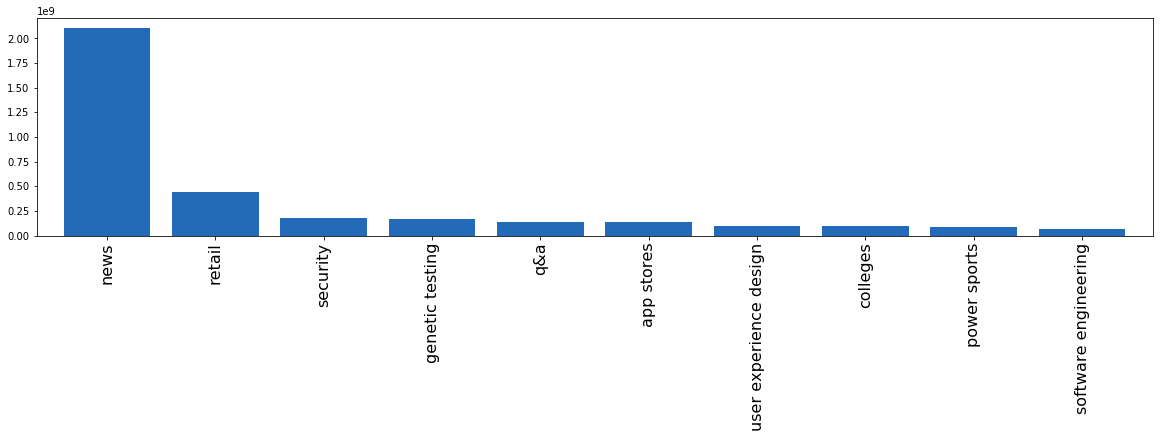

In [89]:
fig = plt.figure(figsize=[20,4])
plt.xticks(fontsize=16)
market_median = df.groupby('market').median().raised.nlargest(10)
market_median.plot(kind='bar', color=random.choice(pallet), width=0.8)
plt.xlabel('')
plt.show()

In [91]:
df[df.market == 'news'].website

618            haystack.tv
2403          blurbity.com
2718           vistkar.com
5746    newsfederation.org
7763           mapicle.com
7790        majhapaper.com
9583      netscape.aol.com
Name: website, dtype: object

In [94]:
bins=[0, 1e6, 10e6, 50e6, 100e6, 1000e6]
groups = df.groupby(['market', pd.cut(df.raised, bins)])
market_bins = groups.count().name.unstack()
market_bins.columns = ['1M', '1-10M', '10-50M', '50-100M', '100-1000M'] 
market_bins = market_bins[market_bins.index != '']

# for col in market_bins.columns:
#     fig = plt.figure(figsize=[20,4])
#     plt.title(col, fontsize=30)
#     plt.xticks(fontsize=16)
#     market_bins[col].nlargest(50).plot(kind='bar', color=random.choice(pallet), width=0.8)
#     plt.xlabel('')

In [95]:
market_sum = df.groupby('market').sum().raised.sort_values(ascending=False).iloc[:50]

In [98]:
trace_1 = go.Bar(x=market_bins['1M'].nlargest(50).index.tolist(), 
                 y=market_bins['1M'].nlargest(50).tolist(), visible=True)

trace_10 = go.Bar(x=market_bins['1-10M'].nlargest(50).index.tolist(), 
                  y=market_bins['1-10M'].nlargest(50).tolist(), visible=False)

trace_50 = go.Bar(x=market_bins['10-50M'].nlargest(50).index.tolist(), 
                  y=market_bins['10-50M'].nlargest(50).tolist(), visible=False)

trace_100 = go.Bar(x=market_bins['50-100M'].nlargest(50).index.tolist(), 
                   y=market_bins['50-100M'].nlargest(50).tolist(), visible=False)

trace_1000 = go.Bar(x=market_bins['100-1000M'].nlargest(50).index.tolist(), 
                    y=market_bins['100-1000M'].nlargest(50).tolist(), visible=False)

data = [trace_1, trace_10, trace_50, trace_100, trace_1000]

button_1 =  dict(label='1M', method='update', 
                 args = [{'visible': [True, False, False, False, False]},
                 {'title': '1M'}])

button_10 =  dict(label='1-10M', method='update', 
                 args = [{'visible': [False, True, False, False, False]},
                 {'title': '1-10M'}])

button_50 =  dict(label='10-50M', method='update', 
                 args = [{'visible': [False, False, True, False, False]},
                 {'title': '10-50M'}])

button_100 =  dict(label='50-100M', method='update', 
                 args = [{'visible': [False, False, False, True, False]},
                 {'title': '50-100M'}])

button_1000 =  dict(label='100-1000M', method='update', 
                 args = [{'visible': [False, False, False, False, True]},
                 {'title': '100-1000M'}])


updatemenus = list([dict(type="buttons", active=-1, buttons=[button_1, button_10, button_50, 
                                                             button_100, button_1000])])

layout = dict(title='Investment By Market', showlegend=False, updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_button')

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



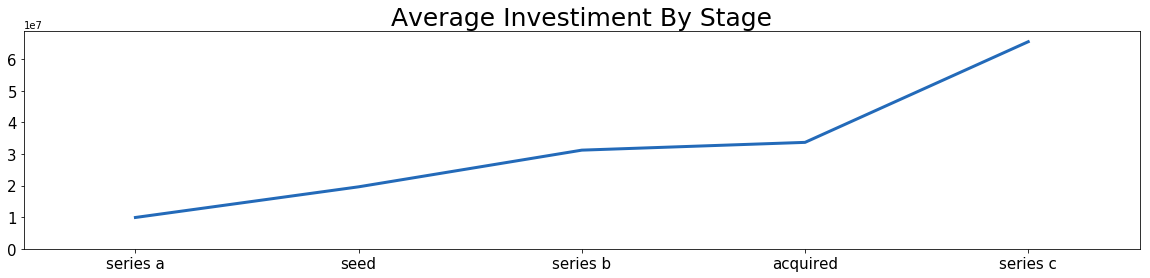

In [99]:
fig = plt.figure(figsize=[20,4])
stage_sum = df.groupby('stage').mean().raised.nsmallest(10)


stage_sum.plot(kind='bar', color='w')
stage_sum.plot(color=random.choice(pallet), linewidth=3, fontsize=15)
plt.xlabel('')
plt.title('Average Investiment By Stage', fontsize=25)
plt.show()

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



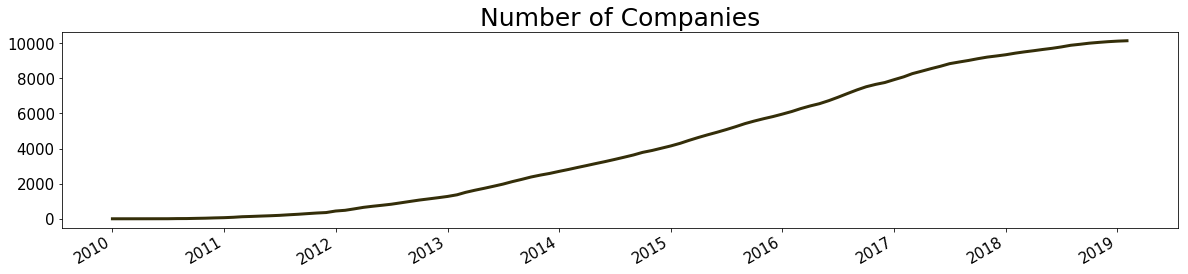

In [100]:
date_counts = df.groupby('joined').count().name.cumsum()
fig = plt.figure(figsize=[20,4])
plt.title('Number of Companies', fontsize=25)
date_counts.plot( color=random.choice(pallet), fontsize=15, linewidth=3)
plt.xlabel('')
plt.show()

/Users/rodrigonader/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



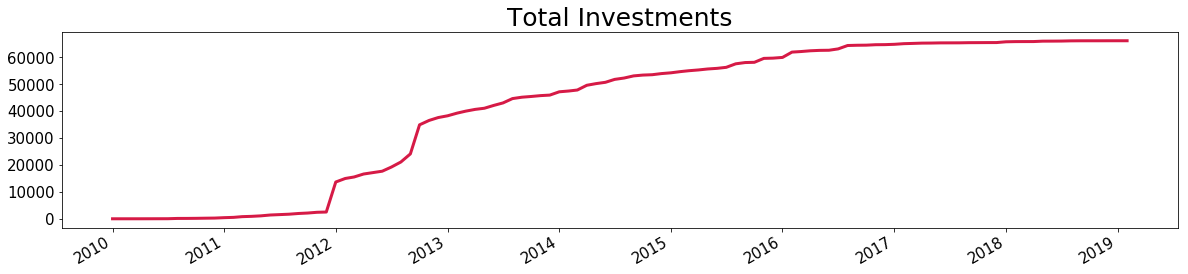

In [103]:
date_raised = df.groupby('joined').sum().m_raised.cumsum()
fig = plt.figure(figsize=[20,4])
plt.title('Total Investments', fontsize=25)
date_raised.plot( color=random.choice(pallet), fontsize=15, linewidth=3)
plt.xlabel('')
plt.show()

In [168]:
raised = pd.DataFrame(columns=df.market.unique(), index=df.joined.sort_values().unique())
for date in raised.index:
    series = df[df.joined == date].groupby('market').sum().m_raised
    for market in series.index:
        raised.loc[date, market] = series[market]
    
raised = raised.fillna(0).cumsum()

In [ ]:
# Plotar de onde são todas as empresas com cor em quanto arrecadaram
# Plotar o quanto arrecadaram por market
# Checar palavras mais usadas nos pitchs
# Quantidade de investimento por regiao
# Plotar paises com mais empresas

# Contar extensão de websites
# Pie chart of stage percentages
# investment distribution given each market

# Quantas empresas por area tiveram investimento maior q um milhao

# Crescimento do investimento total por setor
# numero de investimentos por mes por mercado


# relation between lifetime and raised
# relation between pitch???? and raised

# cluster topics in most similar 20? or at least join topics which are very similar

In [176]:
df.head()

,joined,kind,link,location,market,name,pitch,raised,size,stage,...,tech,min_size,lifetime,raised_month,k_raised,m_raised,b_raised,latitude,longitude,address
0,2010-07-01,startup,https://angel.co/vufind-1,berkeley,enterprise resource planning,vufind (dba deepvu),deep learning as a service for maximizing marg...,680000.0,11-50,seed,...,python,11,105,6476.190476,680.0,0.680,0.000680,NaN,-122.272864,None
1,2010-12-01,startup,https://angel.co/nmodes,toronto,customer service,nmodes,nmodes creates artificial intelligence solutio...,100000.0,1-10,seed,...,python,1,100,1000.000000,100.0,0.100,0.000100,43.653963,-79.387207,None
2,2012-01-01,startup,https://angel.co/tagasauris,santa monica,data mining,tagasauris,video search and discovery platform,1000000.0,1-10,seed,...,python,1,86,11627.906977,1000.0,1.000,0.001000,34.025072,-118.496513,None
3,2012-04-01,startup,https://angel.co/zoemob,san francisco,location based services,zoemob,global family assistant,800000.0,1-10,seed,...,python,1,83,9638.554217,800.0,0.800,0.000800,37.779281,-122.419236,None
4,2012-11-01,startup,https://angel.co/encorealert,san francisco,machine learning,encore,the first automated data scientist for markete...,987000.0,1-10,seed,...,python,1,76,12986.842105,987.0,0.987,0.000987,37.779281,-122.419236,None


In [177]:
df

,joined,kind,link,location,market,name,pitch,raised,size,stage,...,tech,min_size,lifetime,raised_month,k_raised,m_raised,b_raised,latitude,longitude,address
0,2010-07-01,startup,https://angel.co/vufind-1,berkeley,enterprise resource planning,vufind (dba deepvu),deep learning as a service for maximizing marg...,680000.0,11-50,seed,...,python,11,105,6476.190476,680.000,0.680000,0.000680,NaN,-122.272864,None
1,2010-12-01,startup,https://angel.co/nmodes,toronto,customer service,nmodes,nmodes creates artificial intelligence solutio...,100000.0,1-10,seed,...,python,1,100,1000.000000,100.000,0.100000,0.000100,43.653963,-79.387207,None
2,2012-01-01,startup,https://angel.co/tagasauris,santa monica,data mining,tagasauris,video search and discovery platform,1000000.0,1-10,seed,...,python,1,86,11627.906977,1000.000,1.000000,0.001000,34.025072,-118.496513,None
3,2012-04-01,startup,https://angel.co/zoemob,san francisco,location based services,zoemob,global family assistant,800000.0,1-10,seed,...,python,1,83,9638.554217,800.000,0.800000,0.000800,37.779281,-122.419236,None
4,2012-11-01,startup,https://angel.co/encorealert,san francisco,machine learning,encore,the first automated data scientist for markete...,987000.0,1-10,seed,...,python,1,76,12986.842105,987.000,0.987000,0.000987,37.779281,-122.419236,None
5,2013-04-01,startup,https://angel.co/healthy-stove,silicon valley,internet of things,healthy stove,smart technology for eating smarter,88000.0,1-10,seed,...,python,1,71,1239.436620,88.000,0.088000,0.000088,37.442996,-122.154523,None
6,2013-11-01,startup,https://angel.co/quinto,pune,location based services,quinto,food discovery & recommendation,NaN,1-10,seed,...,python,1,64,NaN,NaN,NaN,NaN,18.520306,73.854319,None
7,2013-10-01,startup,https://angel.co/apartmentocean,new york city,messaging,apartment ocean,ai platform for customer service in real estate,370000.0,11-50,seed,...,python,11,65,5692.307692,370.000,0.370000,0.000370,40.730862,-73.987156,None
8,2014-01-01,startup,https://angel.co/redcarpetup-com-1,,consumer lending,redcarpet.cash,data driven lending for purchase finance and i...,120000.0,51-200,seed,...,python,51,62,1935.483871,120.000,0.120000,0.000120,NaN,NaN,None
9,2014-02-01,startup,https://angel.co/voyadi,los angeles,virtual reality,voyadi,travel with passion and purpose,NaN,11-50,seed,...,python,11,61,NaN,NaN,NaN,NaN,34.053683,-118.242767,None
